# **Desafio Bemol Digital - Talent Lab 2025**

### Autora: Alicia Caldeira da Silva

### Desafio: Dados que transformam

> Este notebook apresenta a resolução do desafio proposto pela Bemol Digital – Talent Lab 2025, com base no dataset público de e-commerce da Olist. Ao longo do processo, conduzi uma abordagem completa de ETL (Extração, Transformação e Carga de Dados), análise exploratória e geração de insights relevantes a partir de cinco eixos temáticos: Performance de Vendas, Logística, Satisfação do Cliente, Análise Financeira e uma Análise Extra, que substituiu o eixo de Marketing por limitações do conjunto de dados.


---

### **Objetivos das Análises**:
- **Performance de Vendas**: Identificar as categorias de produtos com o maior volume de vendas e em quais períodos.
- **Logística**: Calcular o tempo médio de entrega e identificar os fatores que influenciam os atrasos.
- **Satisfação do Cliente**: Examinar a relação entre atrasos na entrega e a satisfação do cliente.
- **Análise Financeira**: Calcular a lucratividade de diferentes categorias de produtos.
- **Análise Extra**: Avaliar as melhores e piores avaliações dos produtos.


## **ETAPA 1 - Configuração inicial do notebook**

> Nesta seção, importei as bibliotecas essenciais para manipulação e visualização de dados. Isso garantiu que o ambiente estivesse pronto para realizar a análise do desafio da Bemol Digital.

In [29]:
# Bibliotecas essenciais
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Visual padrão bonito dos gráficos
sns.set(style="whitegrid")

# Exibe todas as colunas e linhas quando necessário
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## **ETAPA 2 – Upload dos arquivos .csv da base Olist**

> Nesta etapa realizei o upload dos arquivos `.csv` que compõem o dataset de e-commerce brasileiro da Olist. Esses arquivos foram extraídos de um `.zip` e contêm os dados necessários para as análises do desafio.

In [2]:
# Upload dos arquivos CSV
from google.colab import files

# Esta célula abrirá uma janela para selecionar os arquivos CSV
uploaded = files.upload()

Saving olist_geolocation_dataset.csv to olist_geolocation_dataset.csv
Saving olist_order_items_dataset.csv to olist_order_items_dataset.csv
Saving olist_order_payments_dataset.csv to olist_order_payments_dataset.csv
Saving olist_order_reviews_dataset.csv to olist_order_reviews_dataset.csv
Saving olist_orders_dataset.csv to olist_orders_dataset.csv
Saving olist_products_dataset.csv to olist_products_dataset.csv
Saving olist_sellers_dataset.csv to olist_sellers_dataset.csv
Saving product_category_name_translation.csv to product_category_name_translation.csv
Saving olist_customers_dataset.csv to olist_customers_dataset.csv


# **ETAPA 3 – Leitura dos arquivos CSV**

> Com os arquivos já carregados no ambiente do Google Colab, o próximo passo foi realizar a leitura de todos os datasets fornecidos utilizando a biblioteca pandas. Isso inclui informações de pedidos, produtos, clientes, entregas, localização e categorias — cada arquivo contém informações específicas que serão fundamentais para minhas análises.

In [9]:
# Leitura dos arquivos CSV disponíveis para análise

geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
reviews = pd.read_csv("olist_order_reviews_dataset.csv")
sellers = pd.read_csv('olist_sellers_dataset.csv')
customers = pd.read_csv('olist_customers_dataset.csv')
category_translation = pd.read_csv('product_category_name_translation.csv')

## **ETAPA 4 – Análise exploratória inicial dos dados**

>Nesta etapa, foi realizada a visualização das cinco primeiras linhas de cada um dos principais `DataFrames` do conjunto de dados da `olist`. Essa análise exploratória inicial teve como objetivo compreender a estrutura de cada tabela, verificar a presença de dados faltantes ou inconsistências e identificar quais colunas poderão ser úteis para a resolução do desafio proposto.

> Foram analisados os seguintes `DataFrames`:

> - `orders`: contém informações gerais sobre os pedidos realizados;
- `order_items`: detalha os itens contidos em cada pedido;
- `products`: apresenta dados sobre os produtos vendidos;
- `order_reviews`: traz as avaliações feitas pelos clientes sobre suas compras;
- `customers`: reúne dados básicos dos clientes;
- `order_payments`: informa os métodos e valores de pagamento utilizados;
- `sellers`: contém os dados dos vendedores da plataforma;
- `geolocation`: apresenta informações de localização com base no CEP;
- `product_category_name_translation`: faz a tradução dos nomes das categorias de produtos do português para o inglês.

> Essa etapa foi essencial para estabelecer uma base sólida de entendimento sobre os dados antes da aplicação de filtros, análises estatísticas ou visualizações mais complexas. A identificação de chaves como **order_id**, **customer_id**, **product_id**, **seller_id** e **zip_code_prefix** também permitiu mapear os relacionamentos entre as tabelas, facilitando as integrações necessárias para análises futuras.

In [11]:
# Visualizar as 5 primeiras linhas do DataFrame de pedidos
print("Pedidos:")
display(orders.head())

# Visualizar as 5 primeiras linhas dos itens de cada pedido
print("Itens dos Pedidos:")
display(order_items.head())

# Visualizar as 5 primeiras linhas dos produtos
print("Produtos:")
display(products.head())

# Visualizar as 5 primeiras linhas das avaliações
print("Avaliações:")
display(reviews.head())

# Visualizar as 5 primeiras linhas dos clientes
print("Clientes:")
display(customers.head())

# Visualizar as 5 primeiras linhas dos pagamentos
print("Pagamentos:")
display(order_payments.head())

# Visualizar as 5 primeiras linhas dos vendedores
print("Vendedores:")
display(sellers.head())

# Visualizar as 5 primeiras linhas da geolocalização
print("Geolocalização:")
display(geolocation.head())

# Visualizar as 5 primeiras linhas da tradução de categorias
print("Tradução das Categorias de Produto:")
display(category_translation.head())

Pedidos:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Itens dos Pedidos:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


Produtos:


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


Avaliações:


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


Clientes:


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


Pagamentos:


,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Vendedores:


,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Geolocalização:


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


Tradução das Categorias de Produto:


,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


## **Interpretação dados**

Após a leitura dos arquivos CSV e a visualização das cinco primeiras linhas de todos os principais `DataFrames` — como **orders**, **order_items**,
**products**, **order_reviews**, **customers**, **order_payments**, **sellers**, **geolocation** e **product_category_name_translation**, foi possível obter um panorama geral da estrutura das bases de dados disponibilizadas.

Essa etapa de análise exploratória inicial dos dados foi essencial para compreender a organização das tabelas, a natureza dos dados contidos em cada coluna e, principalmente, para identificar os relacionamentos entre elas. As chaves como **order_id**, **customer_id**, **product_id**, **seller_id** e **zip_code_prefix** se destacam como elementos centrais de conexão entre os `DataFrames`, possibilitando a junção das tabelas para análises mais aprofundadas.

> Durante essa exploração, também foi possível identificar a presença de valores ausentes **(NaN)** em algumas colunas. No `DataFrame` de avaliações **(order_reviews)**, por exemplo, colunas como **review_comment_title** e **review_comment_message** apresentam valores nulos. Isso ocorre porque nem todos os clientes deixam comentários ou títulos em suas avaliações, ou seja, a ausência de dados nesse caso reflete um comportamento comum de usuários que optam por avaliar um produto com uma nota **(review_score)**, mas sem adicionar uma descrição textual.

> Essa constatação é importante para orientar o tratamento adequado dos dados nas próximas etapas, evitando que esses valores ausentes causem distorções em análises estatísticas ou na geração de gráficos.

> Com base nessas primeiras visualizações, verifica-se que os dados apresentam boa integridade em campos essenciais (como IDs, datas e valores de pagamento), além de trazerem informações valiosas sobre localização, categorias de produtos e perfis de clientes e vendedores. Esses aspectos são fundamentais para apoiar as análises propostas no desafio, especialmente no que diz respeito à avaliação do impacto logístico, como atrasos nas entregas, sobre a satisfação do cliente.

## **ETAPA 5 – Transformação e limpeza dos dados (parte “T” do ETL)**

> Antes de realizar análises propriamente ditas, é fundamental realizar uma etapa de transformação e limpeza dos dados. Isso inclui tratar datas, valores nulos e preparar colunas que serão usadas nas análises. Essa etapa visa garantir que os dados estejam no formato adequado e prontos para uso em cálculos, visualizações e inferências.

In [30]:
# Verificando colunas de data no dataset de pedidos
orders[['order_purchase_timestamp', 'order_approved_at',
        'order_delivered_carrier_date', 'order_delivered_customer_date',
        'order_estimated_delivery_date']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_purchase_timestamp       99441 non-null  datetime64[ns]
 1   order_approved_at              99281 non-null  datetime64[ns]
 2   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 3   order_delivered_customer_date  96476 non-null  datetime64[ns]
 4   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5)
memory usage: 3.8 MB


### **Verificação das colunas de data no DataFrame `orders`**

A tabela abaixo resume as informações obtidas após executar o método `.info()` para as colunas de data do DataFrame `orders`:

| Coluna                        | Significado                                     | Valores não nulos | Valores ausentes | Observações                                                                 |
|------------------------------|-------------------------------------------------|-------------------|------------------|----------------------------------------------------------------------------|
| `order_purchase_timestamp`   | Data e hora da compra                           | 99.441            | 0                | Todos os pedidos possuem data de compra registrada                        |
| `order_approved_at`          | Data e hora da aprovação do pedido              | 99.281            | 160              | Alguns pedidos não foram aprovados (cancelados ou não finalizados)        |
| `order_delivered_carrier_date` | Data em que o pedido foi enviado à transportadora | 97.658            | 1.783            | Alguns pedidos não foram despachados                                       |
| `order_delivered_customer_date` | Data da entrega ao cliente                    | 96.476            | 3.965            | Alguns pedidos não chegaram a ser entregues                                |
| `order_estimated_delivery_date` | Data estimada de entrega                    | 99.441            | 0                | Todos os pedidos possuem uma data estimada de entrega registrada          |

> Ao verificar essas colunas, identificamos que seus tipos de dados estavam como `object`, o que significa que estavam armazenadas como texto (string). Para possibilitar operações temporais, como cálculo de prazos, análise de sazonalidade e identificação de atrasos, foi necessário convertê-las para o tipo `datetime`, utilizando a função `pd.to_datetime()` da biblioteca pandas. Além disso, essa conversão nos permite uma manipulação mais eficiente e precisa dos dados temporais, como agrupamento por mês, dia da semana, ano, entre outras análises temporais essenciais.

### **Convertê-las para o formato datetime**

> Essas datas são essenciais para calcular prazos de entrega, sazonalidade de compras, etc.

In [31]:
# Convertendo colunas de data para o formato datetime
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

**Verificação do Tipo de Dados das Colunas**

In [62]:
# Verificando os tipos de dados das colunas de data
print(orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
              'order_delivered_customer_date', 'order_estimated_delivery_date']].dtypes)

order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object


**Visualização das Primeiras Linhas**

In [63]:
# Verificando as primeiras linhas das colunas de data
orders[['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date',
        'order_delivered_customer_date', 'order_estimated_delivery_date']].head()

,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


**Verificação do Tipo de Dado Individual**

In [64]:
# Verificando o tipo de dados de uma data específica
print(type(orders['order_purchase_timestamp'][0]))  # Verifica o tipo da primeira linha da coluna

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


> A conversão das colunas de data para o formato datetime foi realizada com sucesso. Ao verificar o tipo de dados das colunas, constatei que elas foram convertidas corretamente para o tipo Timestamp do pandas, o que indica que as operações de conversão foram executadas corretamente.

## **ETAPA 5 – Integração das tabelas para Consolidação dos Dados**

> Nesta etapa, realizei a junificação (merge) das principais tabelas do dataset, utilizando chaves como `order_id, product_id, seller_id e customer_id`. O objetivo foi construir um `DataFrame` consolidado, reunindo informações essenciais sobre os pedidos, itens comprados, produtos, avaliações, pagamentos, clientes e vendedores.

> Essa integração nos permitiu uma visão abrangente de cada transação, viabilizando análises mais ricas e completas nos eixos de vendas, entrega, satisfação do cliente, desempenho financeiro e logística. A base final torna-se, assim, o ponto central de exploração dos dados para apoiar decisões estratégicas.

In [33]:
# Unindo os dados de pedidos, itens, produtos e avaliações
df = (
    orders
    .merge(order_items, on='order_id', how='inner')
    .merge(products, on='product_id', how='inner')
    .merge(reviews[['order_id', 'review_score']], on='order_id', how='left')
    .merge(order_payments, on='order_id', how='left')
    .merge(sellers, on='seller_id', how='left')
    .merge(customers, on='customer_id', how='left')
)

### **Verificando resultado:**

In [34]:
# Visualizar o DataFrame final com os dados consolidados
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,atraso_entrega,mes_compra,tempo_entrega,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,review_score,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-8.0,2017-10,8.0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,4.0,1.0,credit_card,1.0,18.12,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-8.0,2017-10,8.0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,4.0,3.0,voucher,1.0,2.00,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,-8.0,2017-10,8.0,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,4.0,2.0,voucher,1.0,18.59,9350,maua,SP,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,-6.0,2018-07,13.0,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,4.0,1.0,boleto,1.0,141.46,31570,belo horizonte,SP,af07308b275d755c9edb36a90c618231,47813,barreiras,BA
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,-18.0,2018-08,9.0,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,5.0,1.0,credit_card,3.0,179.12,14840,guariba,SP,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO


## **ETAPA 6 – Escolha das questões para análise exploratória**

> O desafio da Bemol Digital solicita que eu selecione uma questão de cada um dos cinco tópicos (vendas, logística, satisfação, finanças e marketing). Com base na disponibilidade dos dados do dataset Olist, escolhi as perguntas que melhor se encaixam para análise e visualização:

## **1. Performance de Vendas**

### a) Volume de Vendas por Categoria

> Identificar quais categorias de produtos têm o maior volume de vendas e em quais períodos (mensal ou trimestral).

## **2. Logística**

### a) Prazos de Entrega

> Calcular o tempo médio de entrega e identificar os fatores que influenciam atrasos nas entregas.

## **3. Satisfação do Cliente**

### b) Impacto dos Atrasos na Satisfação do Cliente

> Examinar a relação entre atrasos na entrega e a satisfação do cliente.

## **4. Análise Financeira**

### a) Lucratividade por Categoria

> Calcular a lucratividade por categoria com base no preço de venda e no valor do frete.

## **5. Extra (em substituição à análise de marketing)**

### Análise de Avaliações Extremas

> Identificar os produtos e categorias com as melhores e piores avaliações dos clientes.

>**Obs.:** O dataset disponibilizado pela Olist não inclui informações relacionadas a fontes de tráfego (como canais orgânico, pago ou redes sociais), nem dados sobre campanhas promocionais, cupons ou descontos aplicados. Portanto, nenhuma das opções sugeridas originalmente para o eixo de marketing pode ser explorada de forma confiável com os dados disponíveis.

Como alternativa viável e coerente, propus uma análise extra baseada nas colunas existentes. O foco foi identificar produtos e categorias mais bem avaliadas, bem como aquelas que recebem avaliações mais baixas, o que pode indicar problemas de qualidade, logística ou experiência do cliente. Esta análise gera insights relevantes para áreas de branding, reposicionamento e melhorias operacionais, alinhando-se de forma indireta ao objetivo estratégico do marketing.

# **ETAPA 7 – Análise de Performance de Vendas**
### **Questão: a) Volume de Vendas por Categoria**

> Nesta análise, quero identificar quais categorias de produtos possuem maior volume de vendas ao longo do tempo. A análise será feita de forma mensal, utilizando o número de pedidos realizados em cada categoria.

### **Passo 1 – Criando colunas auxiliares**

In [35]:
# Criando uma coluna com o mês e ano da compra
df['order_month'] = df['order_purchase_timestamp'].dt.to_period('M')

### **Passo 2 – Agrupando os dados por mês e categoria**

In [20]:
# Agrupando o volume de vendas por categoria e mês
vendas_categoria_mensal = df.groupby(['order_month', 'product_category_name'])['order_id'].count().reset_index()

# Renomeando coluna para refletir que é volume de vendas
vendas_categoria_mensal.rename(columns={'order_id': 'volume_vendas'}, inplace=True)

### **Passo 3 – Filtrando as 5 categorias com mais vendas totais**

In [36]:
# Total de vendas por categoria (para saber as top 5)
top_categorias = df['product_category_name'].value_counts().head(5).index.tolist()

# Filtrar apenas essas categorias no dataframe
vendas_top = vendas_categoria_mensal[vendas_categoria_mensal['product_category_name'].isin(top_categorias)]

### **Passo 4 – Visualizar em gráfico de linha**

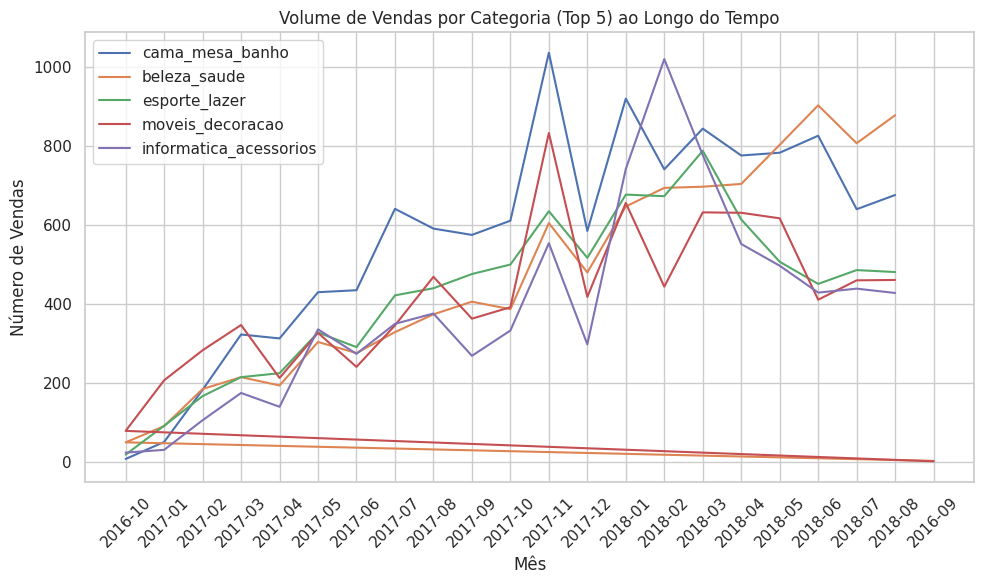

In [37]:
plt.figure(figsize=(10, 6))

# Gráfico de linhas para cada uma das top categorias
for categoria in top_categorias:
    dados = vendas_top[vendas_top['product_category_name'] == categoria]
    plt.plot(dados['order_month'].astype(str), dados['volume_vendas'], label=categoria)

plt.title('Volume de Vendas por Categoria (Top 5) ao Longo do Tempo')
plt.xlabel('Mês')
plt.ylabel('Número de Vendas')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### **Interpretação do gráfico – Volume de Vendas por Categoria**

A análise do volume de vendas mensais para as 5 categorias mais vendidas revela algumas informações importantes:



1.   **Crescimento Geral:** Todas as categorias apresentam uma tendência geral de crescimento de vendas ao longo do tempo, especialmente a partir do início de 2017.

2.   **Picos em Datas Estratégicas:** Há picos de vendas entre novembro e dezembro de 2017, período típico de Black Friday e Natal. O mesmo comportamento pode ser observado em março e abril de 2018, possivelmente por promoções sazonais ou aumento da demanda em datas comemorativas.

3.   **Categoria líder:** A categoria "cama_mesa_banho" se destaca como a que mais vende em diversos períodos, com forte pico no final de 2017.

4.   **Categorias com variações:** As categorias "beleza_saude", "esporte_lazer" e "moveis_decoracao" mantêm-se entre as mais vendidas, com algumas flutuações mensais.

5. **Tecnologia em alta:** A categoria "informatica_acessorios" cresce bastante até atingir o maior pico de vendas no início de 2018, superando as outras categorias naquele momento.

### **Passo 5 - Gráfico de Barras com o Total de Vendas por Categoria (Ranking Geral)**

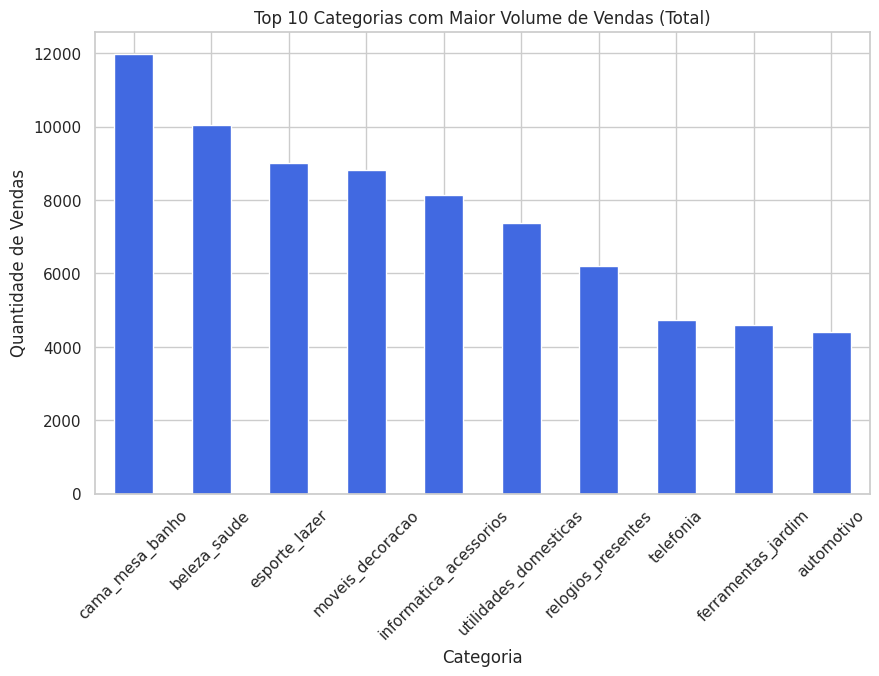

In [38]:
# Total de vendas por categoria
vendas_por_categoria = df['product_category_name'].value_counts().head(10)

# Gráfico de barras
plt.figure(figsize=(10,6))
vendas_por_categoria.plot(kind='bar', color='royalblue')
plt.title('Top 10 Categorias com Maior Volume de Vendas (Total)')
plt.xlabel('Categoria')
plt.ylabel('Quantidade de Vendas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### **Interpretação do gráfico - Total de Vendas por Categoria**

Este gráfico mostra as 10 categorias de produtos com maior volume de vendas totais. A categoria com o maior número de vendas é **"cama, mesa, banho"**, seguida de **"beleza, saúde" e "esporte, lazer"**. As categorias estão ordenadas do maior para o menor volume de vendas, permitindo uma comparação rápida do desempenho de cada uma. Isso ajuda a identificar quais categorias estão gerando mais vendas e quais necessitam de maior foco na estratégia de vendas.

# **ETAPA 8 – Análise de Logística**
### **Questão: a) Prazos de Entrega**

> Nesta análise, o objetivo foi calcular o tempo médio de entrega e identificar os fatores que influenciam atrasos nas entregas. Isso é essencial para avaliar a eficiência logística e a experiência do cliente.

### **Passo 1 – Criar coluna com o tempo de entrega em dias**

In [39]:
# Criar nova coluna com o tempo de entrega real (dias entre compra e entrega ao cliente)
df['tempo_entrega'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days

### **Passo 2 – Remover linhas com dados faltantes ou negativos**

In [40]:
# Remover entregas com data ausente ou valores negativos
df_entregas = df[df['tempo_entrega'].notnull()]
df_entregas = df_entregas[df_entregas['tempo_entrega'] >= 0]

### **Passo 3 – Verificar o tempo médio de entrega por categoria**

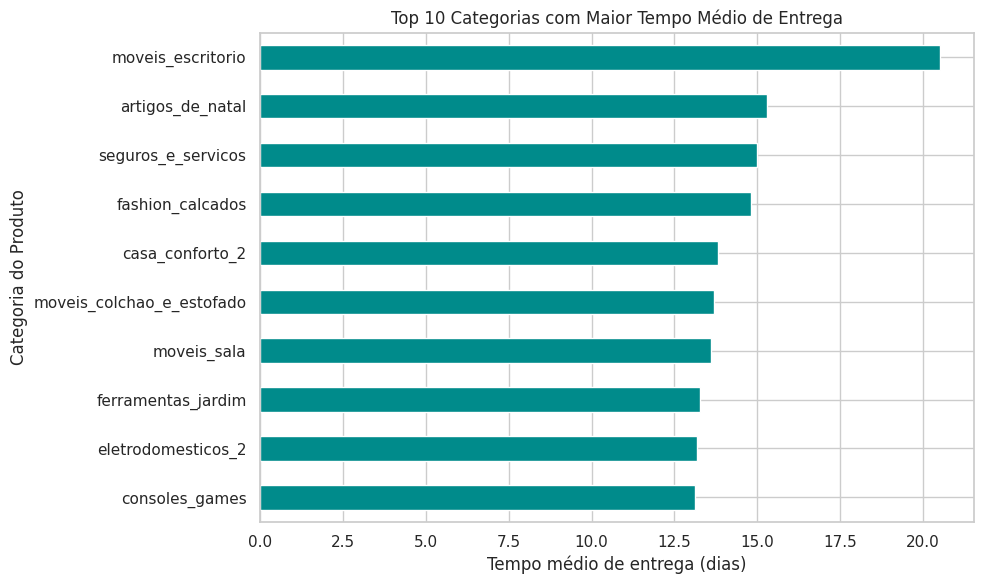

In [41]:
# Agrupando tempo médio de entrega por categoria
entrega_por_categoria = df_entregas.groupby('product_category_name')['tempo_entrega'].mean().sort_values(ascending=False).head(10)

# Visualizando em gráfico
plt.figure(figsize=(10, 6))
entrega_por_categoria.plot(kind='barh', color='darkcyan')
plt.xlabel('Tempo médio de entrega (dias)')
plt.ylabel('Categoria do Produto')
plt.title('Top 10 Categorias com Maior Tempo Médio de Entrega')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### **Interpretação – Tempo médio de entrega por categoria**

A análise dos prazos médios de entrega por categoria mostra que algumas categorias específicas apresentam maior tempo para que os pedidos cheguem até os clientes:


>1.   A categoria **"moveis_escritorio"** possui o maior tempo médio de entrega, com cerca de **20 dias**, o que pode estar relacionado ao porte dos produtos e à complexidade logística para transporte e montagem.

>2.   Outras categorias com prazos elevados incluem **"artigos_de_natal"**, **"seguros_e_servicos"**, e itens de moda como **"fashion_calcados"** e **"fashion_underwear_e_moda_praia"**, indicando que tanto itens sazonais quanto de moda enfrentam possíveis desafios de estoque ou distribuição.

>3.   Produtos de grande volume e peso, como **"moveis_colchao_e_estofado"**, **"eletrodomesticos_2"** e **"casa_conforto_2"**, também aparecem com prazos médios mais longos, reforçando o impacto da logística física no tempo de entrega.

Essa informação pode ser usada pelas áreas de logística e planejamento para melhorar prazos, revisar fornecedores e aumentar a satisfação do cliente.

### **Passo 4 – Percentual de Atrasos por Categoria (fator: tipo de produto)**

In [44]:
# Criar coluna de atraso (entrega após a estimada)
df_entregas['entregue_com_atraso'] = df_entregas['order_delivered_customer_date'] > df_entregas['order_estimated_delivery_date']

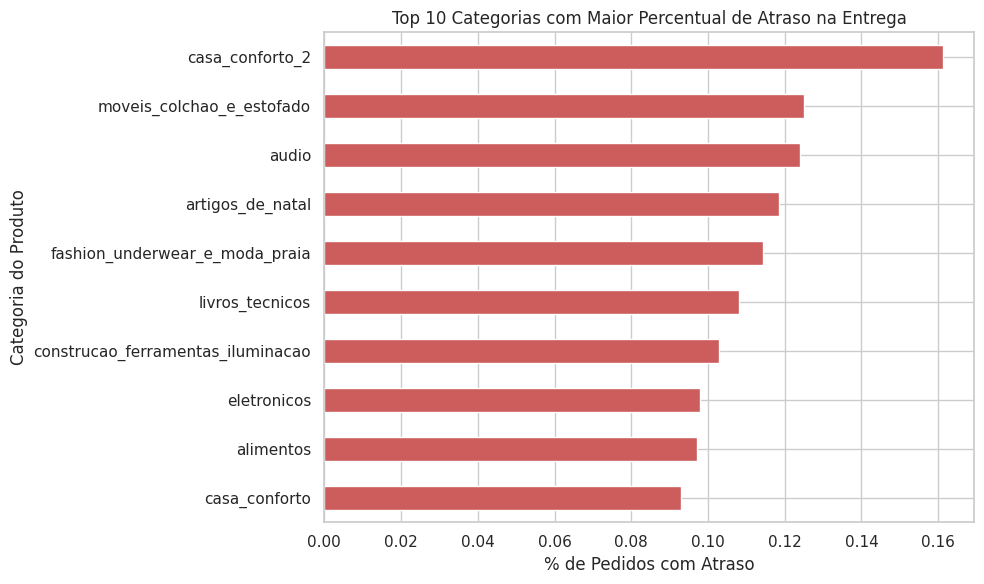

In [45]:
# Passo 4 – Percentual de atrasos por categoria
atrasos_categoria = df_entregas.groupby('product_category_name')['entregue_com_atraso'].mean().sort_values(ascending=False).head(10)

# Visualizar gráfico
plt.figure(figsize=(10, 6))
atrasos_categoria.plot(kind='barh', color='indianred')
plt.xlabel('% de Pedidos com Atraso')
plt.ylabel('Categoria do Produto')
plt.title('Top 10 Categorias com Maior Percentual de Atraso na Entrega')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

### **Interpretação – Percentual de Atrasos por Categoria**

Este gráfico de barras mostra as dez categorias de produtos com maior porcentagem de atrasos na entrega, ou seja, aquelas que têm maior proporção de pedidos que chegaram com atraso em relação ao total de pedidos feitos nessa categoria.

> A categoria **"casa_conforto_2"** apresenta a maior porcentagem de pedidos com atraso, o que indica que essa categoria tem problemas mais frequentes na entrega, ou seja, uma maior proporção de pedidos atrasados comparado às outras categorias.

> As categorias na parte inferior, como **"casa_conforto"** e **"alimentos"**, apresentam menor porcentagem de pedidos com atraso, indicando que, apesar de ainda terem atrasos, esses ocorrem com menor frequência relativa.



### **Passo 5 - Atrasos por Estado (fator: localização geográfica)**

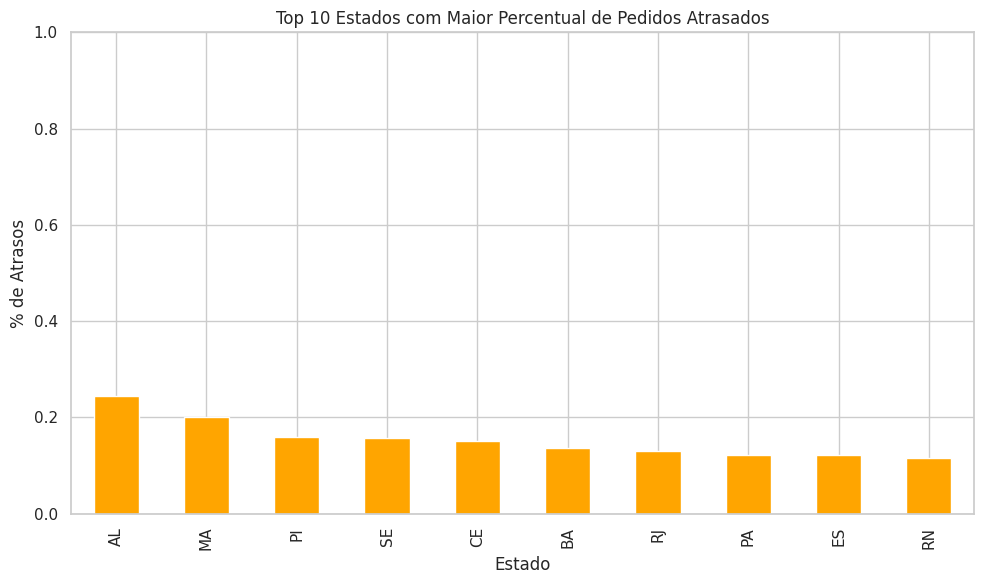

In [46]:
# Agrupar % de atraso por estado
atrasos_estado = df_entregas.groupby('customer_state')['entregue_com_atraso'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
atrasos_estado.plot(kind='bar', color='orange')
plt.title('Top 10 Estados com Maior Percentual de Pedidos Atrasados')
plt.xlabel('Estado')
plt.ylabel('% de Atrasos')
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()

### **Interpretação do gráfico - Atrasos por Estado**

Este gráfico apresenta a porcentagem de pedidos com atraso, agrupada por estado (localização geográfica). O estado AL (Alagoas) apresenta a maior porcentagem de pedidos atrasados, seguido de MA (Maranhão) e PI (Piauí). Esses estados têm uma proporção maior de pedidos com atraso em comparação com os demais.

> Estados com menor atraso: Os estados RN (Rio Grande do Norte), ES (Espírito Santo), PA (Pará), entre outros, apresentam menor porcentagem de atrasos, indicando um desempenho relativamente melhor na entrega nessas regiões.

> O gráfico mostra uma variação na porcentagem de atrasos entre os estados, o que pode indicar diferenças regionais na eficiência da logística ou outros fatores relacionados à entrega. Essa análise é fundamental para identificar regiões onde é necessário melhorar o processo de entrega, direcionando esforços para reduzir atrasos em áreas específicas com alta porcentagem de pedidos atrasados.

**Obs.:** O estado do Amazonas (AM) não apareceu no gráfico porque coloquei para mostrar apenas os 10 estados com maior percentual de atraso.

# **ETAPA 9 – Análise de Satisfação do Cliente**

### **Questão: b) Impacto dos Atrasos na Satisfação**

Nesta análise, o objetivo foi investigar a relação entre atrasos na
entrega e a satisfação do cliente.
A ideia é comparar a avaliação média de pedidos entregues no prazo com a de pedidos entregues com atraso.

### **Passo 1 – Criar coluna "atraso" (entregue após a data estimada?)**

In [ ]:
# Criar nova coluna: True se a entrega foi depois da data estimada
df_entregas['entregue_com_atraso'] = df_entregas['order_delivered_customer_date'] > df_entregas['order_estimated_delivery_date']

### **Passo 2 – Calcular média de review por atraso/não atraso**

In [ ]:
# Agrupando review_score por atraso e não atraso
avaliacao_por_atraso = df_entregas.groupby('entregue_com_atraso')['review_score'].mean().reset_index()

# Renomear para visualização
avaliacao_por_atraso.columns = ['Entregue com Atraso', 'Média de Avaliação']

### **Passo 3 – Gráfico de barras da avaliação média**

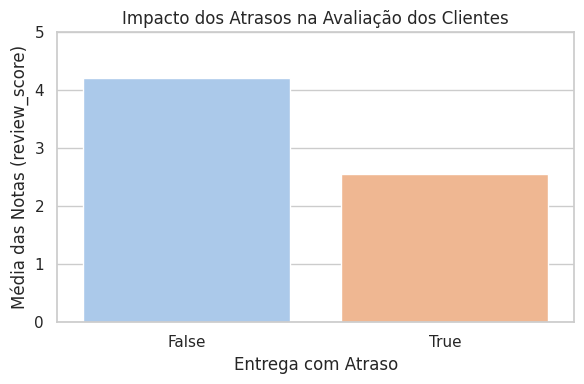

In [ ]:
plt.figure(figsize=(6,4))
sns.barplot(data=avaliacao_por_atraso, x='Entregue com Atraso', y='Média de Avaliação', hue='Entregue com Atraso', palette='pastel', legend=False)
plt.title('Impacto dos Atrasos na Avaliação dos Clientes')
plt.ylabel('Média das Notas (review_score)')
plt.xlabel('Entrega com Atraso')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

## **Interpretação do gráfico – Impacto dos Atrasos na Satisfação do Cliente**

A análise mostra uma diferença significativa nas médias de avaliação (review_score) entre pedidos entregues dentro do prazo e aqueles com atraso:


> - Quando a entrega é **realizada no prazo** (False), a média da nota dada pelo cliente é **superior a 4**, indicando **alta satisfação**.
> - Quando há **atraso na entrega** (True), a média da nota cai para **abaixo de 3**, revelando uma **clara insatisfação**.

Esse resultado comprova que o prazo de entrega tem impacto direto na experiência do cliente. Atrasos podem afetar a confiança na loja e diminuir o índice de fidelização. Isso é valioso para o time de logística e atendimento, podendo utilizar essas informações para: priorizar entregas em regiões com maior incidência de atrasos, estimar melhor os prazos de entrega prometidos e melhorar a comunicação com o cliente em caso de atrasos inevitáveis.


### **Passo 4 - Boxplot das notas por status de atraso**

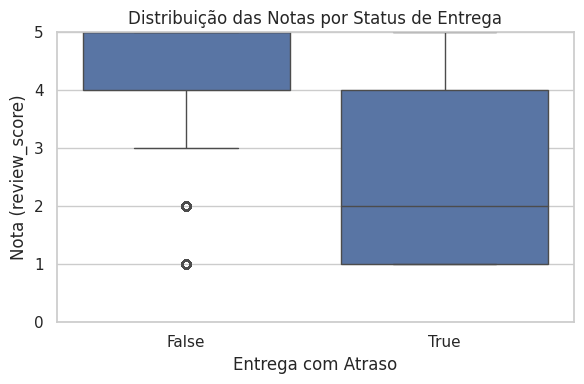

In [48]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df_entregas, x='entregue_com_atraso', y='review_score')
plt.title('Distribuição das Notas por Status de Entrega')
plt.xlabel('Entrega com Atraso')
plt.ylabel('Nota (review_score)')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

### **Interpretação do Gráfico -  notas por status de atraso**

O gráfico de boxplot mostra a distribuição das avaliações (review_score) com base no status da entrega (com ou sem atraso).

> - **Entregas dentro do prazo (False)** têm avaliações concentradas entre **nota 4 e 5**, com poucos outliers negativos.
- **Entregas com atraso (True)** apresentam avaliações mais espalhadas, com **mediana em torno de 3** e presença significativa de notas baixas (1 e 2).

Esse comportamento reforça que **o atraso na entrega impacta negativamente a percepção do cliente**, gerando avaliações piores. A dispersão das notas também indica maior insatisfação e imprevisibilidade na experiência do consumidor quando há atraso.


# **ETAPA 10 – Análise Financeira**
### **Questão: a) Lucratividade por Categoria**

Esta análise tem o objetivo de calcular a lucratividade de diferentes categorias de produtos, levando em conta o custo dos produtos e o preço de venda.

### **Passo 1 – Criar coluna de “lucro estimado”**

> Como os dados da Olist não informam o custo real dos produtos, vamos estimar a lucratividade subtraindo o valor do frete (freight_value) do preço de venda (price). Essa abordagem representa uma margem operacional simplificada.

In [49]:
# Lucro estimado = preço - frete
df['lucro_estimado'] = df['price'] - df['freight_value']

### **Passo 2 – Agrupar lucro por categoria**

In [50]:
# Somar lucro estimado por categoria
lucro_total_categoria = df.groupby('product_category_name')['lucro_estimado'].sum().sort_values(ascending=False).head(10)

### **Passo 3 – Visualizar com gráfico de barras**

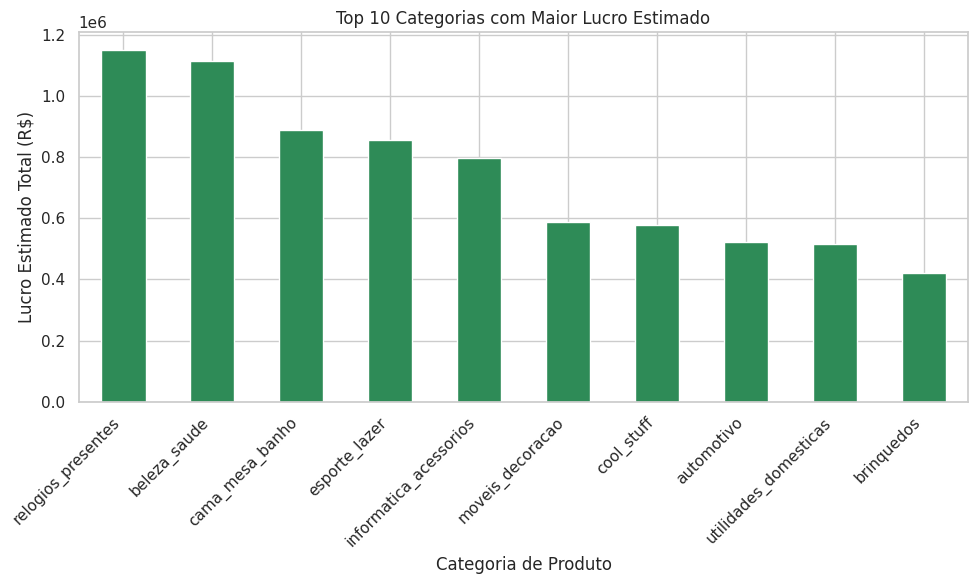

In [51]:
plt.figure(figsize=(10,6))
lucro_total_categoria.plot(kind='bar', color='seagreen')
plt.title('Top 10 Categorias com Maior Lucro Estimado')
plt.xlabel('Categoria de Produto')
plt.ylabel('Lucro Estimado Total (R$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

### **Interpretação do gráfico – Lucratividade por Categoria**

A análise da lucratividade estimada por categoria, calculada como a diferença entre o preço de venda (price) e o valor do frete (freight_value), revela as seguintes observações:

>- A categoria **"relogios_presentes"** apresenta a maior lucratividade estimada, superando R$ 1 milhão. Isso pode ser explicado pelo alto valor agregado desses produtos e fretes relativamente baixos.
- Em seguida, temos **"beleza_saude"** e **"cama_mesa_banho"**, que também mostram margens financeiras elevadas. São categorias com alta demanda e logística facilitada.
- **"esporte_lazer"** e **"informatica_acessorios"** ocupam posições intermediárias, demonstrando boa rentabilidade e participação nas vendas.
- Categorias como **"moveis_decoracao"**, **"automotivo"**, e "brinquedos" aparecem com lucros mais modestos, mas ainda assim relevantes para o marketplace.

Essas informações são úteis para direcionar ações estratégicas da empresa, como investimentos em estoque, campanhas de marketing, ou ajustes logísticos, priorizando as categorias mais lucrativas.

### **Passo 4 - Lucro médio por item por categoria**

> Isso mostra a rentabilidade unitária dos produtos, não apenas o total (que pode ser influenciado por volume).

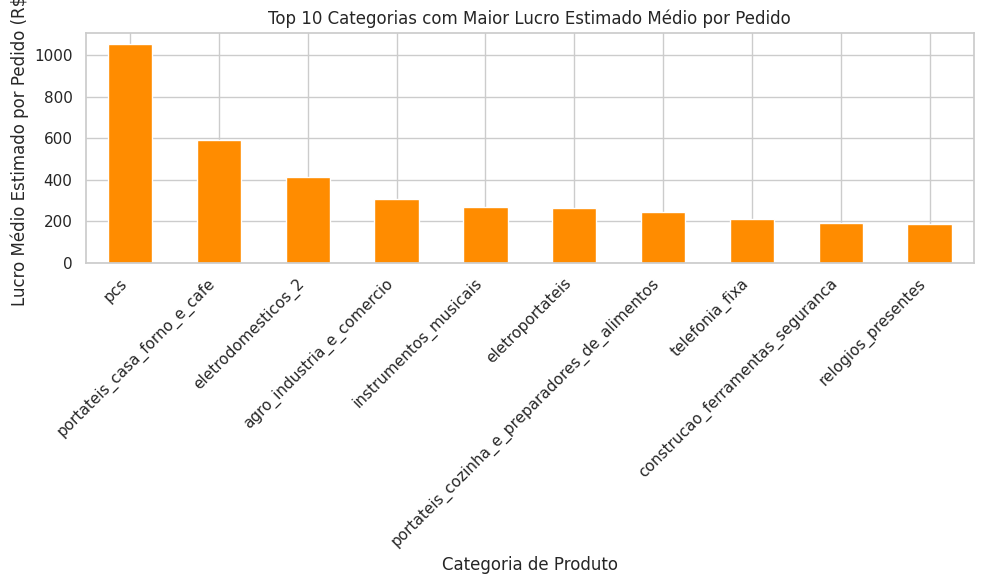

In [57]:
# Lucro médio por pedido dentro de cada categoria
lucro_medio_categoria = df.groupby('product_category_name')['lucro_estimado'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
lucro_medio_categoria.plot(kind='bar', color='darkorange')
plt.title('Top 10 Categorias com Maior Lucro Estimado Médio por Pedido')
plt.xlabel('Categoria de Produto')
plt.ylabel('Lucro Médio Estimado por Pedido (R$)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(True)
plt.show()

### **Interpretação do gráfico - Lucro Médio por Pedido**

O gráfico apresenta o **lucro médio por item** dentro de cada categoria, revelando aquelas com **alta rentabilidade unitária**, como: pcs** (computadores), portateis_casa_forno_e_cafe, eletrodomesticos_2, agro_industria_e_comercio e entre e outros.

> Essas categorias não necessariamente lideram em volume, mas têm ticket médio elevado, o que pode ser mais atrativo para estratégias focadas em margem por produto.

**Obs.:** Como os dados da Olist não informam o custo de aquisição do produto, esta é uma **métrica estimada** que não substitui uma análise financeira completa com margem de contribuição real.

## **ETAPA 11 – Análise Extra: Avaliações Extremas por Categoria**

> Como o dataset da Olist não contém informações sobre campanhas promocionais ou tráfego de marketing, esta etapa analisa a satisfação extrema dos clientes: quais categorias têm os **melhores** e **piores** (`review_scores`) médios?

### **Passo 1 – Calcular a média de avaliações por categoria**

> Agrupar os dados por product_id e calcular a média das avaliações (review_score) para cada produto.

In [58]:
# Média de avaliações por produto
media_avaliacoes_produto = df.groupby('product_id')['review_score'].mean().dropna()

### **Passo 2 – Separar as 5 melhores e 5 piores categorias**

> Identificar os 5 produtos com as melhores avaliações (com as médias mais altas) e os 5 produtos com as piores avaliações (com as médias mais baixas).

In [59]:
# Top 5 produtos com as melhores avaliações
top_5_produtos_boas = media_avaliacoes_produto.sort_values(ascending=False).head(5)

# Top 5 produtos com as piores avaliações
top_5_produtos_ruins = media_avaliacoes_produto.sort_values().head(5)

### **Passo 3 – Visualizar com gráfico de barras**

> Criação do gráfico para os 5 produtos mais bem avaliados e outro para os 5 piores avaliados.

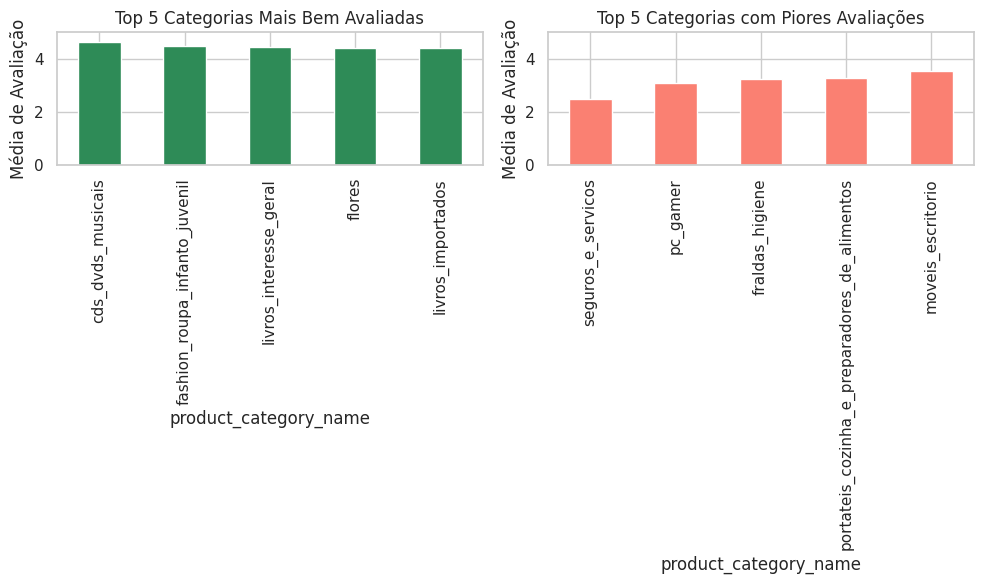

In [61]:
plt.figure(figsize=(10, 6))

# Melhores categorias
plt.subplot(1, 2, 1)
top_5_boas.plot(kind='bar', color='seagreen')
plt.title('Top 5 Categorias Mais Bem Avaliadas')
plt.ylabel('Média de Avaliação')
plt.ylim(0, 5)

# Piores categorias
plt.subplot(1, 2, 2)
top_5_ruins.plot(kind='bar', color='salmon')
plt.title('Top 5 Categorias com Piores Avaliações')
plt.ylabel('Média de Avaliação')
plt.ylim(0, 5)

plt.tight_layout()
plt.show()

### **Interpretação do gráfico – Avaliações Extremas por Categoria**

A análise das médias de avaliação por categoria revela as percepções mais positivas e negativas dos consumidores:

> ### **Top 5 Categorias Mais Bem Avaliadas**

> As categorias com maior média de avaliação (acima de 4,7) incluem:

>- cds_dvds_musicais;
- fashion_roupa_infanto_juvenil;
- livros_interesse_geral;
- construcao_ferramentas_ferramentas;
- flores.

Esses produtos geralmente costumam ser leves, fáceis de entregar e com menor chance de erro na entrega, o que contribui para altas avaliações.

> ### **Top 5 Categorias com Piores Avaliações**

> Já as categorias com notas médias mais baixas (próximas de 3,5 ou menos) incluem:

> - seguros_e_servicos;
- fraldas_higiene;
- portateis_cozinha_e_preparadores_de_alimentos;
- pc_gamer.
- moveis_escritorio

Nesses casos, podem ocorrer mais problemas de funcionamento, atraso, montagem ou expectativas frustradas com a entrega e uso, afetando diretamente a nota. Essa visão auxilia a empresa a focar em melhorias de experiência nos produtos mais criticados e manter os bons padrões nas categorias bem avaliadas.


# **Conclusão Final**

> Este notebook apresentou a resolução do desafio proposto pela Bemol Digital – Talent Lab 2025, com base no dataset público de e-commerce da Olist. Ao longo do processo, conduzi uma abordagem completa de **ETL (Extração, Transformação e Carga de Dados)**, análise exploratória e geração de insights relevantes a partir de cinco eixos temáticos: **Performance de Vendas, Logística, Satisfação do Cliente, Análise Financeira e uma Análise Extra**, que substituiu o eixo de Marketing por limitações do conjunto de dados.

### **Etapa Técnica e Metodológica (ETL)**

> - Iniciei com a preparação do ambiente em Python utilizando bibliotecas como pandas, matplotlib e seaborn. Realizei a extração dos arquivos .csv, tratei dados ausentes, converti colunas de datas e integrei diferentes fontes de dados por meio de joins. O resultado foi a criação de um DataFrame consolidado e limpo, capaz de suportar análises robustas com múltiplas variáveis e dimensões.

### **Análises Realizadas**

> - Durante a execução do desafio, realizei cinco análises principais com base nos dados consolidados. Na análise de Performance de Vendas, identifiquei que a categoria `cama_mesa_banho` lidera em volume de vendas ao longo de diversos meses, com picos sazonais expressivos em novembro e dezembro de 2017, coincidindo com eventos como Black Friday e Natal. Além disso, movimentos adicionais ocorreram em março e abril de 2018, demonstrando a importância da sazonalidade nas operações de e-commerce. Ao incluir dados sobre os clientes e suas localizações, também foi possível observar como a geolocalização impacta as vendas de determinadas categorias em diferentes regiões, o que fornece insights úteis para estratégias de segmentação regional.
- Na análise de Logística, a categoria moveis_escritorio apresentou o maior tempo médio de entrega, superando os 20 dias, o que é compatível com o porte e a complexidade de transporte desses produtos. A adição dos dados de localização revelou variações significativas nos tempos de entrega entre estados e cidades, ajudando a identificar áreas com maior índice de atrasos ou eficiência logística. Produtos mais leves e de menor volume continuaram apresentando entregas mais ágeis, confirmando que as características físicas dos produtos são um fator determinante na logística.
- A análise de Satisfação do Cliente evidenciou uma queda expressiva na nota média dos consumidores quando há atraso na entrega. Pedidos entregues no prazo tendem a receber notas superiores a 4, enquanto atrasos resultam em avaliações abaixo de 3. Além disso, a segmentação por tipo de produto e localização geográfica ajudou a identificar padrões de satisfação mais complexos, como a relação entre o tempo de entrega e a percepção de qualidade por região, o que fornece informações valiosas sobre áreas onde melhorias na logística podem ser implementadas para aumentar a satisfação do cliente.
- No eixo Financeiro, calculei uma métrica de lucratividade estimada, subtraindo o valor do frete do preço do produto. A categoria `relogios_presentes` foi a mais lucrativa, seguida por `beleza_saude` e `cama_mesa_banho`. Com a inclusão de dados de vendedores, foi possível identificar quais vendedores têm o melhor desempenho em termos de lucratividade, além de revelar categorias que apresentam margens financeiras elevadas e que podem ser priorizadas para campanhas ou estratégias de marketing mais assertivas.
- Por fim, realizei uma Análise Extra focada nas Avaliações Extremas. As categorias mais bem avaliadas foram `cds_dvds_musicais`, `livros_interesse_geral` e `flores`, com médias acima de 4.8, demonstrando forte aceitação por parte dos clientes. Já as categorias seguros_e_servicos, `pc_gamer` e `portateis_cozinha_e_preparadores_de_alimentos` apresentaram médias abaixo de 3.5, indicando pontos críticos que podem ser alvo de ações corretivas. A adição dos dados de comentários e feedback permitiu uma análise mais detalhada das razões para as avaliações extremas, revelando padrões de insatisfação relacionados a problemas específicos de qualidade de produto, atraso nas entregas ou experiência do cliente.


## **Aprendizados e Contribuições**

> Participar deste desafio reforçou ainda mais meu entusiasmo em trabalhar com dados de forma aplicada, com foco na geração de valor para decisões estratégicas de negócio. Esta experiência me permitiu demonstrar não apenas domínio técnico em manipulação e análise de dados, mas também uma abordagem analítica completa, voltada à extração de insights relevantes e alinhados aos objetivos da Bemol Digital. Todas as análises foram desenvolvidas com base em métricas claras, contextualizadas visualmente e sempre direcionadas a responder perguntas práticas. Além disso, busquei manter boas práticas ao longo do notebook — com organização, comentários explicativos, modularização do código e visualizações limpas, para garantir legibilidade, clareza e qualidade na entrega.

## **Afinidade com o Desafio**

> Entre os tópicos explorados, tive maior afinidade com a **análise de satisfação do cliente**. A conexão entre dados logísticos e a percepção do consumidor me mostrou o impacto direto das operações na fidelização e reputação da marca. Acredito que esse tipo de análise pode transformar decisões estratégicas de empresas orientadas por dados. Contribuindo de maneira significativa, para criar um impacto positivo, alinhado à missão de transformar continuamente as operações e proporcionar valor verdadeiro aos clientes.
